## Base Model Q3

In [3]:
%load_ext autoreload
%autoreload 2

In [15]:
from ift6758.features.feature_engineering1 import SeasonDataSet
from sklearn.linear_model import LogisticRegression
import numpy as np
import os
import random



In [16]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [17]:
train_years = [2015,2016,2017]
val_years = [2018]
test_years=[2019]


In [18]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl


In [19]:
val_dataset = SeasonDataSet(val_years)
val_df = val_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [20]:
features = ["distanceNet","angleNet"]
label_column = "isGoal"

In [21]:
train_df.isnull().sum() ##No nulls in our features

result.event                      0
gamePk                            0
team.name                         0
about.period                      0
about.periodTime                  0
about.periodType                  0
about.periodTimeRemaining         0
coordinates.x                     0
coordinates.y                     0
result.secondaryType             27
result.emptyNet                   0
result.strength.name         223950
shooter                           0
goalie                         1096
goalCoordinates                   0
isGoal                            0
distanceNet                       0
angleNet                          0
dtype: int64

In [22]:
train_df

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,0.174672
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-0.071307
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-0.813962
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-0.035699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246798,Shot,2017030415,Vegas Golden Knights,3,16:01,REGULAR,03:59,-33.0,-25.0,Wrist Shot,0,NaN,Colin Miller,Braden Holtby,"(89, 0)",0,124.535136,0.202120
246799,Shot,2017030415,Vegas Golden Knights,3,16:06,REGULAR,03:54,-35.0,-29.0,Slap Shot,0,NaN,Colin Miller,Braden Holtby,"(89, 0)",0,127.345985,0.229742
246800,Shot,2017030415,Vegas Golden Knights,3,16:08,REGULAR,03:52,-82.0,-3.0,Wrist Shot,0,NaN,Alex Tuch,Braden Holtby,"(89, 0)",0,171.026314,0.017542
246801,Shot,2017030415,Vegas Golden Knights,3,16:09,REGULAR,03:51,-83.0,-4.0,Wrist Shot,0,NaN,Alex Tuch,Braden Holtby,"(89, 0)",0,172.046505,0.023252


In [23]:
def XY(df,label_column,features):
    X = df.drop([label_column],axis=1)[features]
    Y = df[label_column]
    return X,Y




## Spliting X&Y

In [24]:
Xtrain,Ytrain = XY(train_df,label_column,features)
Xval,Yval = XY(val_df,label_column,features)



## Training

In [25]:
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)


LogisticRegression()

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix


In [27]:
Ytrain.sum()/Ytrain.shape[0]

0.09253728924132956

In [28]:

def plotConfusion(Y,Ypred):
    cm = confusion_matrix(Y,Ypred)

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual:0', 'Actual:1'], 
                                    index=['Predict:0','Predict:1'])

    plt.figure(figsize=(10,5))
    sns.heatmap(cm_matrix, annot=True, fmt='d')
    plt.tight_layout()
    print(classification_report(Y, Ypred))




C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    223950
           1       0.00      0.00      0.00     22837

    accuracy                           0.91    246787
   macro avg       0.45      0.50      0.48    246787
weighted avg       0.82      0.91      0.86    246787



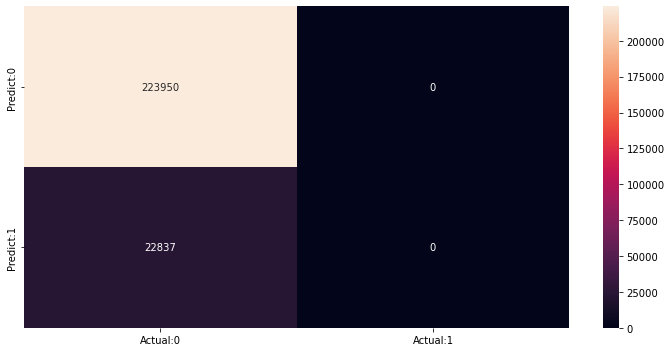

In [29]:
y_pred_train  = clf.predict(Xtrain)
plotConfusion(Ytrain,y_pred_train)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     77688
           1       0.00      0.00      0.00      8247

    accuracy                           0.90     85935
   macro avg       0.45      0.50      0.47     85935
weighted avg       0.82      0.90      0.86     85935



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

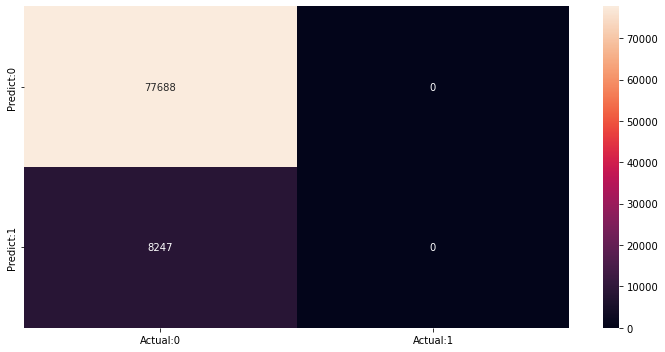

In [30]:
y_pred_val  = clf.predict(Xval)
plotConfusion(Yval,y_pred_val)


* It's always pedicting 0, although about 10% of data is 1
* (Need to explore) Why it's happening (Mostly because the features - diatance,angle values are similar for 1 and 0), and output of predict is 0 or 1 with probability threshold 0.5

In [31]:
y_pred_val_probs  = clf.predict_proba(Xval)
# plotConfusion(Yval,y_pred_val)

In [32]:
y_pred_val_probs

array([[0.88772277, 0.11227723],
       [0.9317579 , 0.0682421 ],
       [0.92589069, 0.07410931],
       ...,
       [0.89171664, 0.10828336],
       [0.92488645, 0.07511355],
       [0.92951063, 0.07048937]])